In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error
import seaborn as sns

In [2]:
orig_df = pd.read_csv('../../data/dengue_features_train.csv')
labels_df =  pd.read_csv('../../data/dengue_labels_train.csv')

imp_df = pd.DataFrame(columns=orig_df.columns)

for c in orig_df.city.unique():

    imp = SimpleImputer(strategy="most_frequent")
    np_arr = imp.fit_transform(orig_df[orig_df['city']==c])
    _df = pd.DataFrame(np_arr, columns = orig_df.columns)
    imp_df = pd.concat([imp_df, _df])

imp_df.reset_index(inplace=True)
imp_df = imp_df.astype(orig_df.dtypes.to_dict()).drop('index', axis=1)

df = imp_df
df = pd.concat([df,labels_df['total_cases']], axis=1)
df['city'] = df['city'].map({'sj':0, 'iq':1})



/home/jan/.local/lib/python3.8/site-packages/sklearn/impute/_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/home/jan/.local/lib/python3.8/site-packages/sklearn/impute/_base.py:42: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m

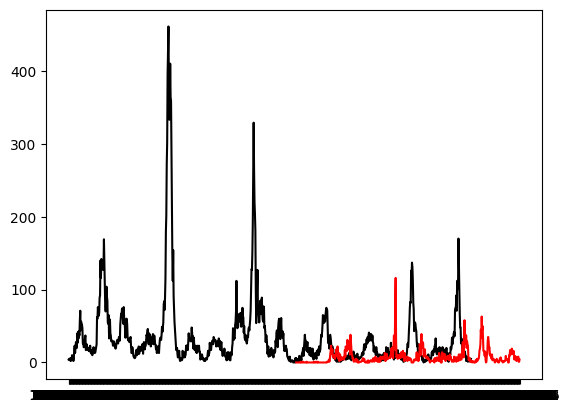

In [3]:

plt.plot(df[df['city']==0]['week_start_date'],df[df['city']==0]['total_cases'],color='k')
plt.plot(df[df['city']==1]['week_start_date'],df[df['city']==1]['total_cases'],color='r')

plt.show()

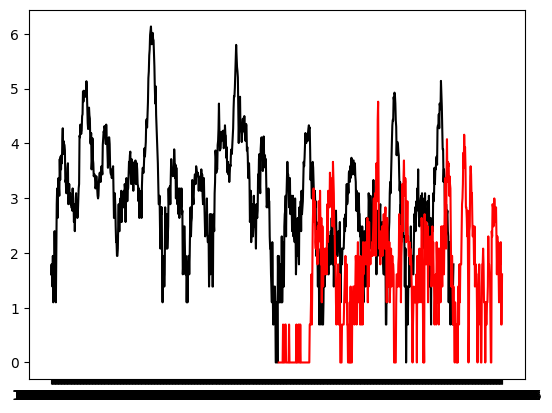

In [5]:
df['log_total_cases+1'] = np.log(df['total_cases']+1)
plt.plot(df[df['city']==0]['week_start_date'],df[df['city']==0]['log_total_cases+1'],color='k')
plt.plot(df[df['city']==1]['week_start_date'],df[df['city']==1]['log_total_cases+1'],color='r')

plt.show()

city
count    911.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: city, dtype: float64
count    25.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: city, dtype: float64


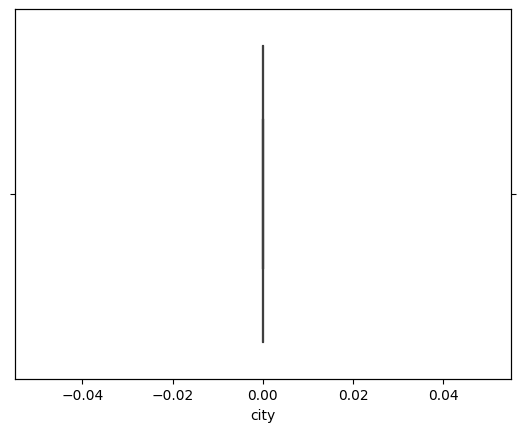


year
count     911.000000
mean     1998.916575
std         5.230475
min      1990.000000
25%      1995.000000
50%      1999.000000
75%      2003.000000
max      2008.000000
Name: year, dtype: float64
count      25.000000
mean     1995.560000
std         3.096773
min      1991.000000
25%      1994.000000
50%      1994.000000
75%      1998.000000
max      2007.000000
Name: year, dtype: float64


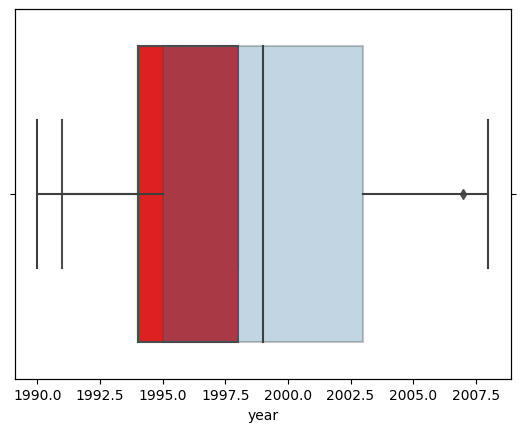


weekofyear
count    911.000000
mean      26.131723
std       15.022481
min        1.000000
25%       13.000000
50%       26.000000
75%       39.000000
max       53.000000
Name: weekofyear, dtype: float64
count    25.000000
mean     40.040000
std       6.187891
min      30.000000
25%      35.000000
50%      40.000000
75%      45.000000
max      52.000000
Name: weekofyear, dtype: float64


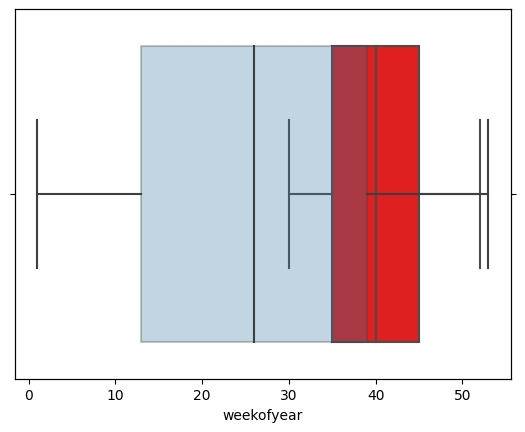


week_start_date
count            911
unique           911
top       1993-08-13
freq               1
Name: week_start_date, dtype: object
count             25
unique            25
top       1994-10-08
freq               1
Name: week_start_date, dtype: object
ndvi_ne
count    911.000000
mean       0.065260
std        0.097857
min       -0.406250
25%        0.018146
50%        0.083050
75%        0.100150
max        0.493400
Name: ndvi_ne, dtype: float64
count    25.000000
mean      0.088398
std       0.043845
min       0.021850
25%       0.055400
50%       0.096900
75%       0.096900
max       0.243800
Name: ndvi_ne, dtype: float64


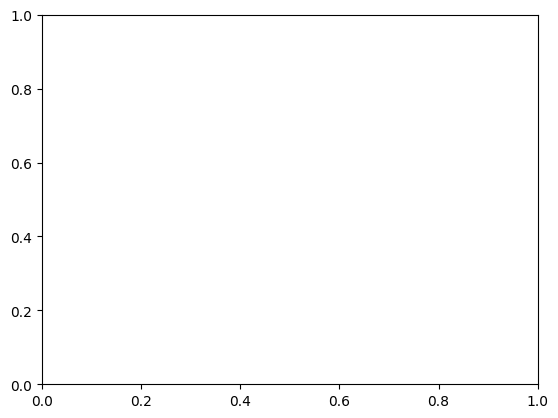

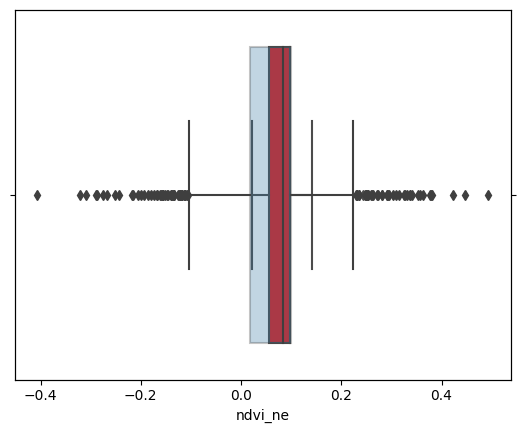


ndvi_nw
count    911.000000
mean       0.069032
std        0.091550
min       -0.456100
25%        0.017820
50%        0.070700
75%        0.113325
max        0.437100
Name: ndvi_nw, dtype: float64
count    25.000000
mean      0.099174
std       0.031129
min       0.024767
25%       0.076225
50%       0.112700
75%       0.112700
max       0.151900
Name: ndvi_nw, dtype: float64


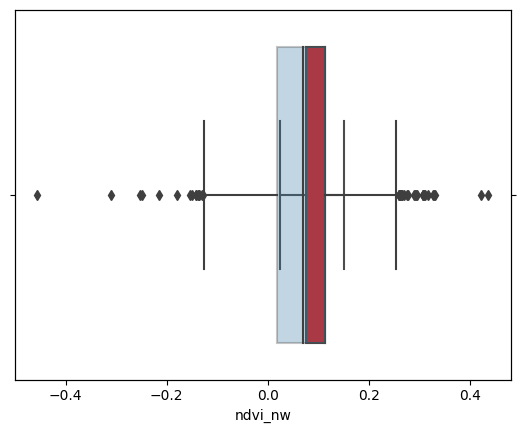


ndvi_se
count    911.000000
mean       0.177624
std        0.057077
min       -0.015533
25%        0.139227
50%        0.177229
75%        0.212271
max        0.393129
Name: ndvi_se, dtype: float64
count    25.000000
mean      0.194639
std       0.035339
min       0.095500
25%       0.180967
50%       0.198483
75%       0.198483
max       0.291686
Name: ndvi_se, dtype: float64


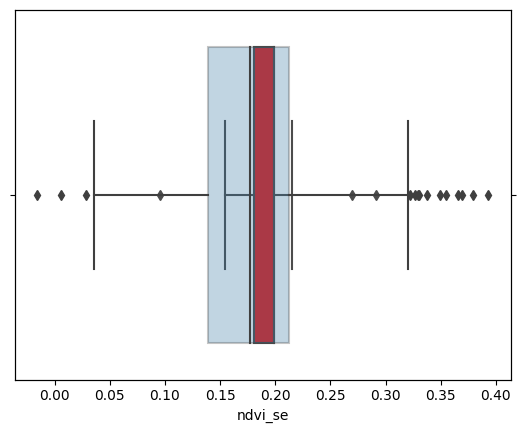


ndvi_sw
count    911.000000
mean       0.165750
std        0.056064
min       -0.063457
25%        0.129121
50%        0.165986
75%        0.202662
max        0.381420
Name: ndvi_sw, dtype: float64
count    25.000000
mean      0.175657
std       0.027093
min       0.117729
25%       0.168871
50%       0.168871
75%       0.173900
max       0.247971
Name: ndvi_sw, dtype: float64


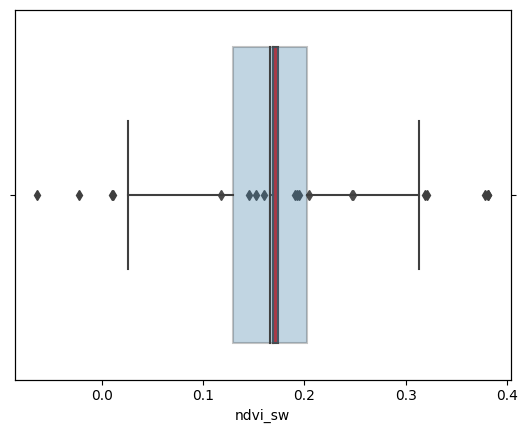


precipitation_amt_mm
count    911.000000
mean      34.904555
std       44.871498
min        0.000000
25%        0.000000
50%       20.040000
75%       51.405000
max      390.600000
Name: precipitation_amt_mm, dtype: float64
count     25.000000
mean      43.335600
std       28.660027
min        0.630000
25%       19.450000
50%       38.440000
75%       61.110000
max      111.520000
Name: precipitation_amt_mm, dtype: float64


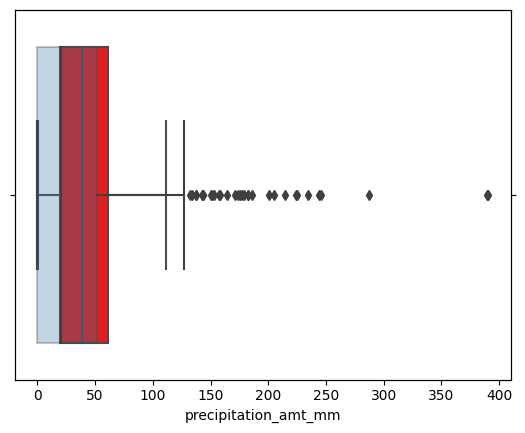


reanalysis_air_temp_k
count    911.000000
mean     299.151714
std        1.239777
min      295.938571
25%      298.178571
50%      299.237143
75%      300.120000
max      302.200000
Name: reanalysis_air_temp_k, dtype: float64
count     25.000000
mean     299.772000
std        0.797124
min      297.808571
25%      299.297143
50%      299.885714
75%      300.377143
max      301.022857
Name: reanalysis_air_temp_k, dtype: float64


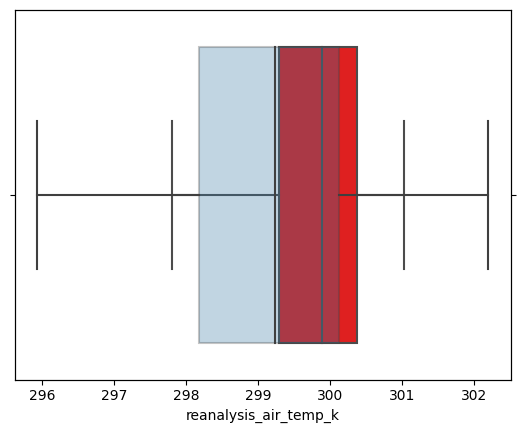


reanalysis_avg_temp_k
count    911.000000
mean     299.266175
std        1.222360
min      296.114286
25%      298.282143
50%      299.378571
75%      300.214286
max      302.164286
Name: reanalysis_avg_temp_k, dtype: float64
count     25.000000
mean     299.850571
std        0.792444
min      297.950000
25%      299.300000
50%      300.035714
75%      300.500000
max      301.028571
Name: reanalysis_avg_temp_k, dtype: float64


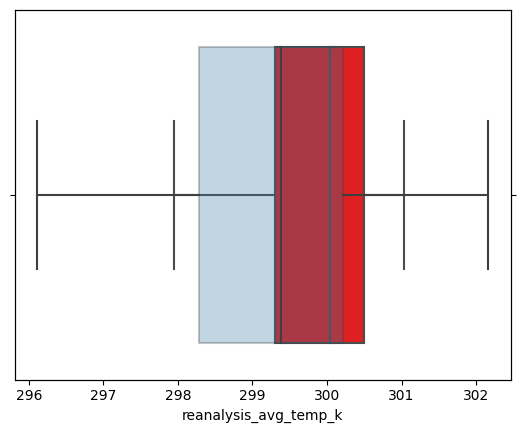


reanalysis_dew_point_temp_k
count    911.000000
mean     295.090417
std        1.576056
min      289.642857
25%      293.812143
50%      295.438571
75%      296.425000
max      297.795714
Name: reanalysis_dew_point_temp_k, dtype: float64
count     25.000000
mean     296.175657
std        0.786513
min      294.812857
25%      295.674286
50%      296.131429
75%      296.642857
max      297.467143
Name: reanalysis_dew_point_temp_k, dtype: float64


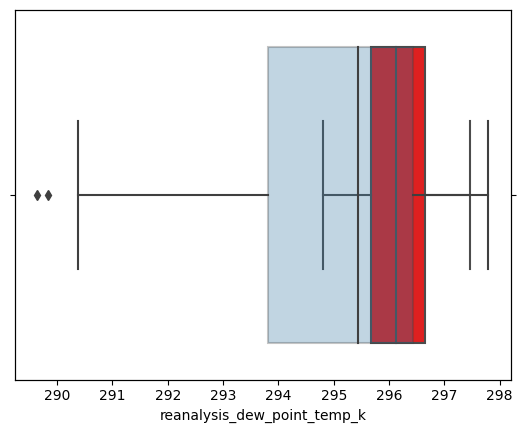


reanalysis_max_air_temp_k
count    911.000000
mean     301.383864
std        1.257563
min      297.800000
25%      300.400000
50%      301.500000
75%      302.400000
max      304.300000
Name: reanalysis_max_air_temp_k, dtype: float64
count     25.000000
mean     302.160000
std        0.987843
min      299.400000
25%      301.800000
50%      302.200000
75%      303.000000
max      303.500000
Name: reanalysis_max_air_temp_k, dtype: float64


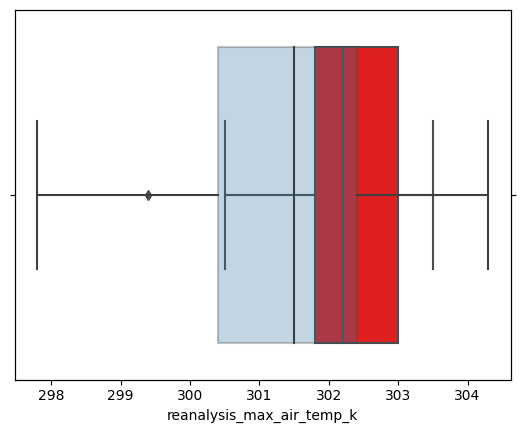


reanalysis_min_air_temp_k
count    911.000000
mean     297.288474
std        1.298651
min      292.600000
25%      296.300000
50%      297.500000
75%      298.350000
max      299.900000
Name: reanalysis_min_air_temp_k, dtype: float64
count     25.000
mean     297.956
std        0.780
min      296.300
25%      297.500
50%      298.100
75%      298.600
max      299.100
Name: reanalysis_min_air_temp_k, dtype: float64


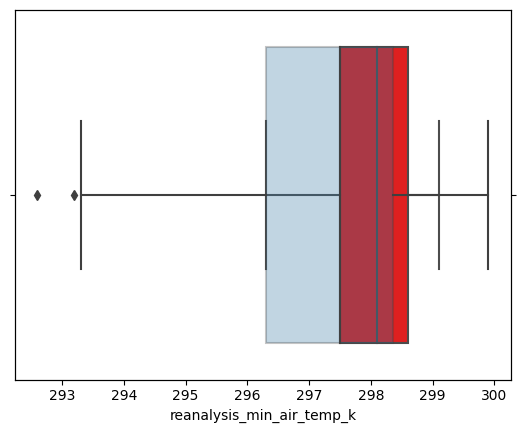


reanalysis_precip_amt_kg_per_m2
count    911.000000
mean      29.814566
std       35.573883
min        0.000000
25%       10.300000
50%       20.640000
75%       36.360000
max      570.500000
Name: reanalysis_precip_amt_kg_per_m2, dtype: float64
count     25.000000
mean      48.862800
std       30.088839
min        2.800000
25%       27.400000
50%       45.200000
75%       64.850000
max      107.870000
Name: reanalysis_precip_amt_kg_per_m2, dtype: float64


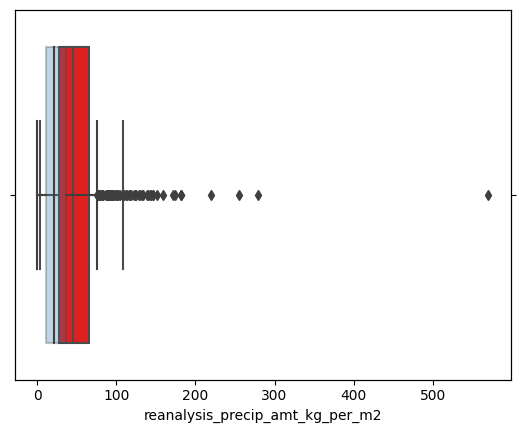


reanalysis_relative_humidity_percent
count    911.000000
mean      78.503568
std        3.369237
min       66.735714
25%       76.201429
50%       78.620000
75%       80.895000
max       87.575714
Name: reanalysis_relative_humidity_percent, dtype: float64
count    25.000000
mean     80.861086
std       2.943861
min      74.117143
25%      78.685714
50%      81.217143
75%      83.450000
max      85.570000
Name: reanalysis_relative_humidity_percent, dtype: float64


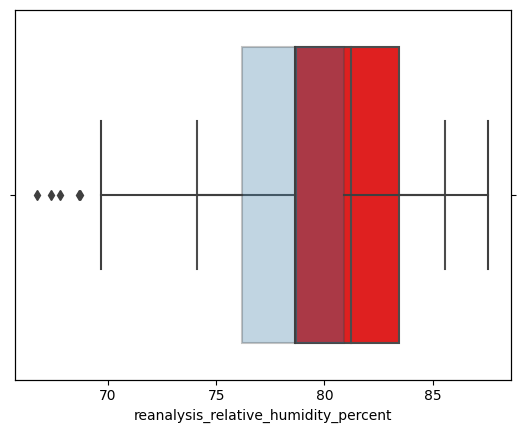


reanalysis_sat_precip_amt_mm
count    911.000000
mean      34.904555
std       44.871498
min        0.000000
25%        0.000000
50%       20.040000
75%       51.405000
max      390.600000
Name: reanalysis_sat_precip_amt_mm, dtype: float64
count     25.000000
mean      43.335600
std       28.660027
min        0.630000
25%       19.450000
50%       38.440000
75%       61.110000
max      111.520000
Name: reanalysis_sat_precip_amt_mm, dtype: float64


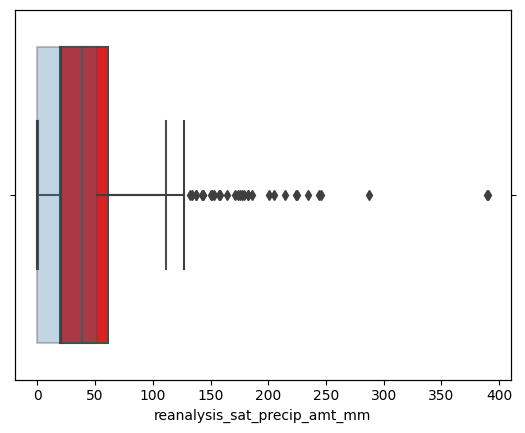


reanalysis_specific_humidity_g_per_kg
count    911.000000
mean      16.533094
std        1.565853
min       11.715714
25%       15.203571
50%       16.822857
75%       17.870000
max       19.440000
Name: reanalysis_specific_humidity_g_per_kg, dtype: float64
count    25.000000
mean     17.625600
std       0.850097
min      16.178571
25%      17.067143
50%      17.521429
75%      18.118571
max      19.027143
Name: reanalysis_specific_humidity_g_per_kg, dtype: float64


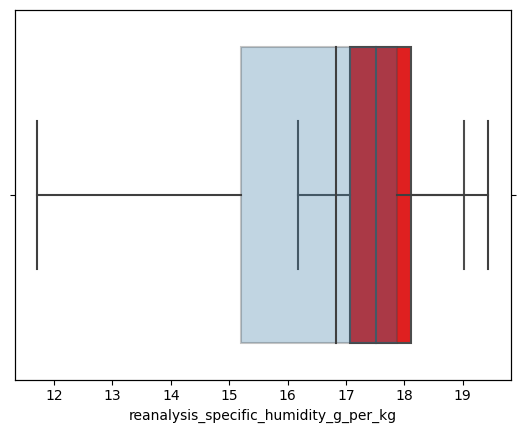


reanalysis_tdtr_k
count    911.000000
mean       2.519523
std        0.497948
min        1.357143
25%        2.157143
50%        2.457143
75%        2.800000
max        4.428571
Name: reanalysis_tdtr_k, dtype: float64
count    25.000000
mean      2.359429
std       0.461543
min       1.500000
25%       2.028571
50%       2.400000
75%       2.671429
max       3.271429
Name: reanalysis_tdtr_k, dtype: float64


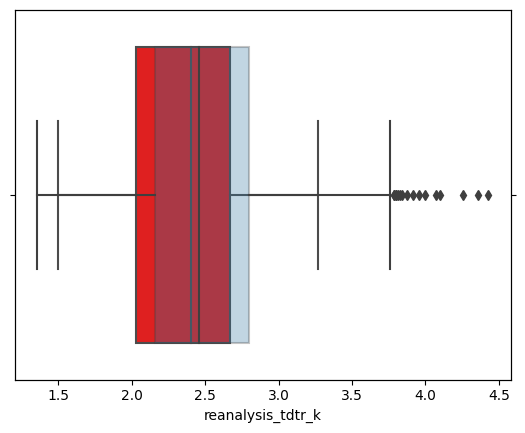


station_avg_temp_c
count    911.000000
mean      26.986420
std        1.416908
min       22.842857
25%       25.792857
50%       27.200000
75%       28.178571
max       30.071429
Name: station_avg_temp_c, dtype: float64
count    25.000000
mean     28.070286
std       0.844731
min      26.271429
25%      27.557143
50%      28.157143
75%      28.571429
max      29.428571
Name: station_avg_temp_c, dtype: float64


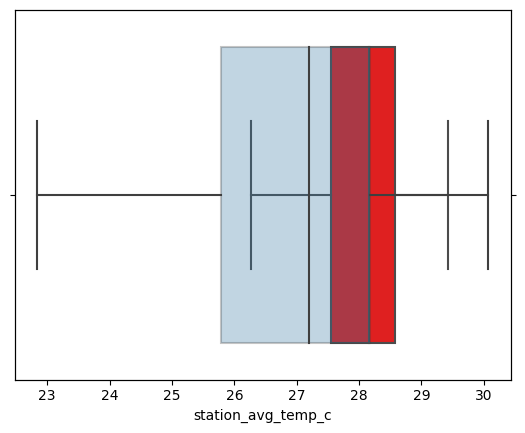


station_diur_temp_rng_c
count    911.000000
mean       6.749553
std        0.839283
min        4.528571
25%        6.185714
50%        6.757143
75%        7.285714
max        9.914286
Name: station_diur_temp_rng_c, dtype: float64
count    25.000000
mean      6.905143
std       0.633166
min       5.728571
25%       6.414286
50%       6.885714
75%       7.271429
max       8.742857
Name: station_diur_temp_rng_c, dtype: float64


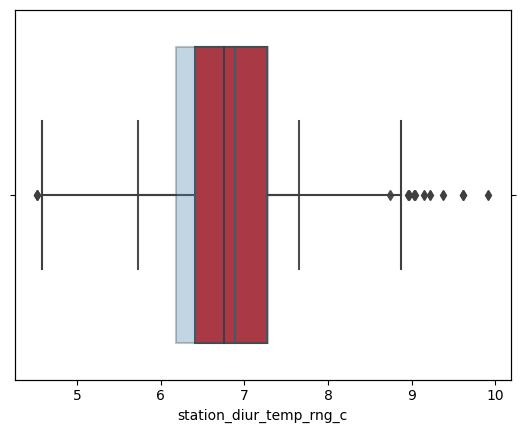


station_max_temp_c
count    911.000000
mean      31.581120
std        1.711331
min       26.700000
25%       30.600000
50%       31.700000
75%       32.800000
max       35.600000
Name: station_max_temp_c, dtype: float64
count    25.000000
mean     32.872000
std       1.331828
min      30.000000
25%      32.200000
50%      32.800000
75%      33.900000
max      35.000000
Name: station_max_temp_c, dtype: float64


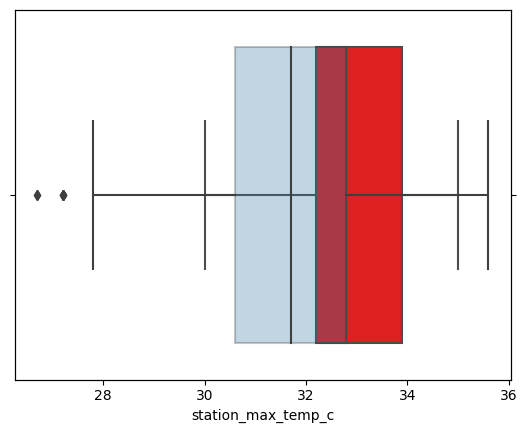


station_min_temp_c
count    911.000000
mean      22.585291
std        1.508169
min       17.800000
25%       21.700000
50%       22.800000
75%       23.900000
max       25.600000
Name: station_min_temp_c, dtype: float64
count    25.000000
mean     23.472000
std       1.096403
min      21.100000
25%      22.200000
50%      23.900000
75%      24.400000
max      25.600000
Name: station_min_temp_c, dtype: float64


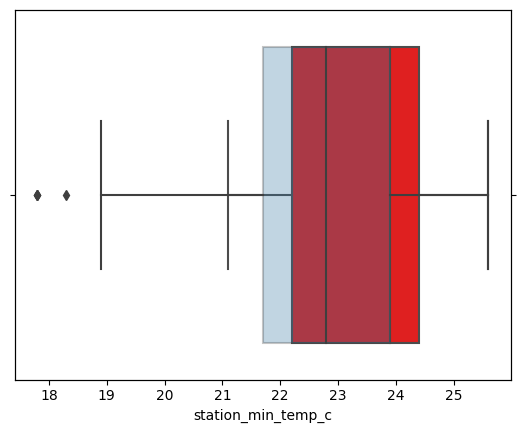


station_precip_mm
count    911.000000
mean      26.290450
std       29.140723
min        0.000000
25%        6.550000
50%       17.300000
75%       34.350000
max      305.900000
Name: station_precip_mm, dtype: float64
count     25.000000
mean      38.396000
std       33.478233
min        1.900000
25%       11.000000
50%       34.300000
75%       50.800000
max      146.400000
Name: station_precip_mm, dtype: float64


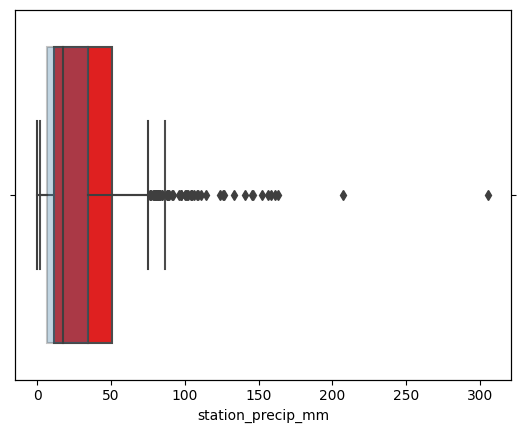


total_cases
count    911.000000
mean      27.343578
std       27.083417
min        0.000000
25%        9.000000
50%       18.000000
75%       35.000000
max      150.000000
Name: total_cases, dtype: float64
count     25.000000
mean     283.320000
std       92.781428
min      154.000000
25%      202.000000
50%      272.000000
75%      359.000000
max      461.000000
Name: total_cases, dtype: float64


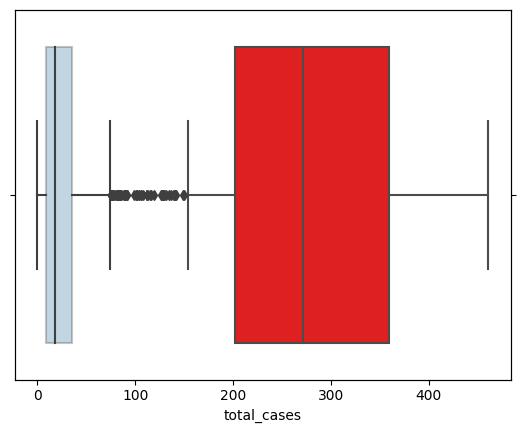


log_total_cases+1
count    911.000000
mean       2.931329
std        0.950018
min        0.000000
25%        2.302585
50%        2.944439
75%        3.583519
max        5.017280
Name: log_total_cases+1, dtype: float64
count    25.000000
mean      5.597215
std       0.335300
min       5.043425
25%       5.313206
50%       5.609472
75%       5.886104
max       6.135565
Name: log_total_cases+1, dtype: float64


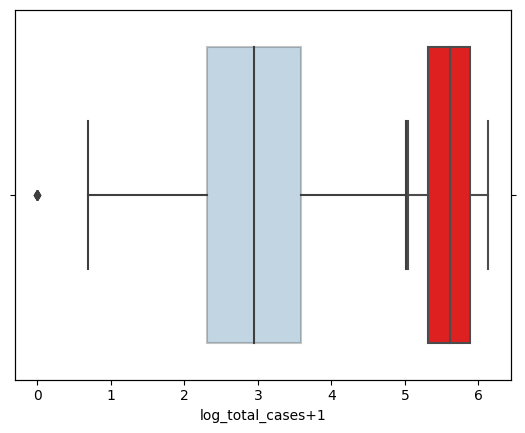

In [8]:
for c in df.columns:
    print(c)
    print(df[(df['city']==0)&(df['total_cases']<=150)][c].describe())
    print(df[(df['city']==0)&(df['total_cases']>150)][c].describe())
    try:
        fig, ax = plt.subplots()
        sns.boxplot(x=df[(df['city']==0)&(df['total_cases']>150)][c], color='r', ax=ax)
        ax2 = ax.twinx()
        #plt.show()
        sns.boxplot(x=df[(df['city']==0)&(df['total_cases']<=150)][c], boxprops=dict(alpha=.3),ax=ax2)
        plt.show()
    except:
        continue
    print('')
    